# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  74: KNN 3 - Abhishek Waghchaure</p>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 1</p>

## Question 1 : Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.
---

In [241]:
from sklearn.datasets import load_iris

In [242]:
X,y = load_iris(return_X_y=True)

In [243]:
print(X[0:10])
print(y[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [246]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [248]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [249]:
knn_y_pred = knn.predict(X_test)

In [250]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [251]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



<Axes: >

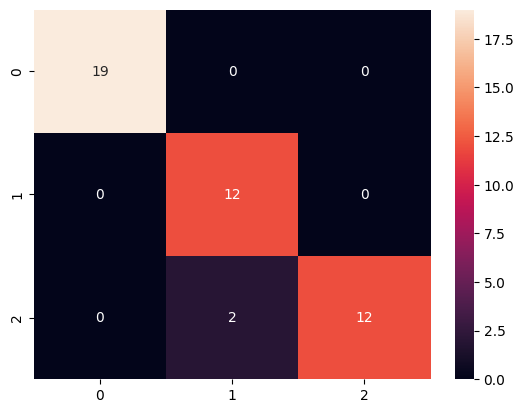

In [252]:
import seaborn as sns
cf = confusion_matrix(y_test,knn_y_pred)
sns.heatmap(cf,annot = True, fmt='d')

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 2</p>

## Question 2 : Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.
---

In [253]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [255]:
## checking nul values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [256]:
## Seperate X and y 
X= df.drop(columns = 'medv', axis=1)
y= df['medv']

In [257]:
X.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [258]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [259]:
## Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [260]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [261]:
## Implementing KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)


In [262]:
knn_regressor.fit(X_train,y_train)


KNeighborsRegressor()

In [263]:
knn_regressor_y_pred = knn_regressor.predict(X_test)

In [264]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [265]:
print("R2 score : ", r2_score(y_test,knn_regressor_y_pred))
print("MAE :", mean_absolute_error(y_test, knn_regressor_y_pred))
print("MSE :", mean_squared_error(y_test, knn_regressor_y_pred))

R2 score :  0.4661453519153391
MAE : 4.532156862745098
MSE : 48.27226666666665


### Hyperparameter tuning of model

In [266]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors' : [5],
    'weights': ['uniform', 'distance'],
    'p' : [1,2,3],
    'algorithm' : ['ball_tree','kd_tree','auto']
}
gscv = GridSearchCV(KNeighborsRegressor(),param_grid= parameters,cv=5,scoring= 'neg_mean_squared_error')

In [267]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'auto'],
                         'n_neighbors': [5], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [268]:
gscv.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

In [269]:
gscv.best_score_

-34.49027361328469

In [270]:
gscv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [271]:
gscv_y_pred =gscv.predict(X_test)

In [272]:
print("r2 score :", r2_score(y_test,gscv_y_pred))
print("MAE score :", mean_absolute_error(y_test,gscv_y_pred))
print("MSE score :", mean_squared_error(y_test,gscv_y_pred))

r2 score : 0.6023551381014054
MAE score : 3.6742237453589985
MSE score : 35.95588964349475


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 3</p>


## Question 3 : Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.
---

In [273]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [274]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [275]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [288]:
## Hyper parameter tuning

parameters = {
    'n_neighbors':[2,4,6,7,9,11],
    'p' :[1,2,3],
    'weights' : ['uniform','distance'],
    'algorithm':['ball_tree','kd_tree']
    
}
gscv2 = GridSearchCV(KNeighborsClassifier(),param_grid=parameters,cv = 5, scoring='accuracy')

In [289]:
gscv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [2, 4, 6, 7, 9, 11], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [290]:
gscv2.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [291]:
gscv2_pred = gscv2.predict(X_test)

In [292]:
print(classification_report(y_test,gscv2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

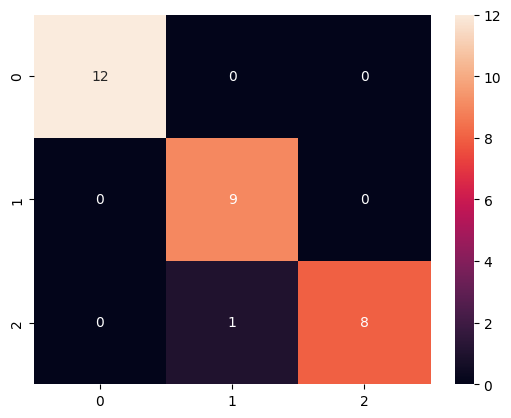

In [293]:
sns.heatmap(confusion_matrix(y_test,gscv2_pred), annot = True, fmt='d')

In [294]:
accuracy_score(y_test,gscv2_pred)

0.9666666666666667

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 4</p>

## Question 4 : Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets
---

In [295]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [296]:
X = df.drop(labels=['medv'],axis=1)
Y = df[['medv']]

In [297]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [298]:
xtrain.shape, ytrain.shape

((354, 13), (354, 1))

In [299]:
xtest.shape, ytest.shape

((152, 13), (152, 1))

In [300]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [301]:
xtrain.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800


In [302]:
xtest.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.406801,-0.505125,-1.022256,-0.281546,-0.405218,0.125771,0.553831,-0.527348,-0.514369,-0.667776,-0.744571,0.412412,-0.476058
1,-0.411057,1.266629,-0.681651,3.551814,-0.945403,0.601965,-1.299478,0.146831,-0.630274,-0.920352,-0.300837,0.428541,-1.251858
2,-0.405120,-0.505125,2.396785,-0.281546,0.443643,-0.477130,1.085934,-0.893900,-0.630274,1.827911,0.808498,0.350317,0.795352
3,-0.406818,-0.505125,-0.046624,-0.281546,-1.236931,-0.362955,-2.208034,0.716631,-0.630274,-0.613653,0.409138,0.359533,-0.971669
4,0.195119,-0.505125,1.005500,-0.281546,1.335376,-0.039923,0.832552,-0.658340,1.687825,1.557294,0.852872,0.292484,0.682714


In [303]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [304]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.70757722, 0.6421702 , 0.71614969, 0.71381021, 0.72490399])

In [305]:
import numpy as np
cval_score = np.mean(scores)
print(f'Cross Validation R2 Score on training data is {cval_score:.4f}')

Cross Validation R2 Score on training data is 0.7009


In [306]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm used to compute nearest neighbors
    'p': [1, 2]  # power parameter for Minkowski distance metric
}

In [307]:
from sklearn.model_selection import GridSearchCV
gscv_boston = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,cv=5,scoring='r2')

In [308]:
gscv_boston.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [309]:
gscv_boston.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [310]:
gscv_boston.best_score_

0.7829978784524041

In [311]:
ypred_test = gscv.predict(xtest)
ypred_test[0:5]

array([26.85520257, 26.85134678, 26.8500498 , 26.85594795, 26.84494696])

In [312]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred_test)
mse = mean_squared_error(ytest,ypred_test)
rmse = mse**(1/2)
r2 = r2_score(ytest,ypred_test)

In [313]:
print(f'Testing MAE  : {mae:.2f}')
print(f'Testing MSE  : {mse:.2f}')
print(f'Testing RMSE : {rmse:.2f}')
print(f'Testing R2   : {r2:.4f}')

Testing MAE  : 8.67
Testing MSE  : 104.07
Testing RMSE : 10.20
Testing R2   : -0.3967


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 5</p>

## Question 5 : Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.
---

In [315]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

In [316]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

In [317]:
xtrain.shape, ytrain.shape

((100, 4), (100,))

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [319]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=5,weights='distance')
knnc.fit(xtrain,ytrain)

KNeighborsClassifier(weights='distance')

In [320]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnc,xtrain,ytrain,cv=5, scoring='accuracy')
scores

array([1.  , 0.85, 0.9 , 1.  , 0.95])

In [321]:
import numpy as np
cval_score = np.mean(scores)
print(f'Mean Cross Validation Score for 5 fold cross validation is {cval_score:.4f}')

Mean Cross Validation Score for 5 fold cross validation is 0.9400


In [322]:
ypred_test = knnc.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [323]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 6</p>

## Question 6 : Implement a function to standardise the features before applying KNN classifier.
---

In [324]:
# Creating a function to return model object and cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np

def scale_and_predict_knn(X,Y,n=5,test_size=0.33,cv=5):
    # Train Test Split
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y ,test_size=test_size,random_state=42)
    # Standard Scaling the data
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    # KNN Base Classifier
    knnc = KNeighborsClassifier(n_neighbors=n)
    knnc.fit(xtrain,ytrain)
    # Cross Val Estimation
    scores = cross_val_score(knnc, xtrain, ytrain, cv=cv,scoring='accuracy')
    # Mean Cross Val Score
    cval_score_mean = np.mean(scores)
    # Test Data Classification Report
    ypred_test = knnc.predict(xtest)
    print('Classification Report on Test data :\n')
    print(classification_report(ytest, ypred_test))
    return xtrain, xtest, ytrain, ytest, knnc, cval_score_mean    

In [325]:
# Load Cancer dataset
from sklearn.datasets import load_breast_cancer
X,Y = load_breast_cancer(return_X_y=True)

In [326]:
# Using the function to evaluate the data
xtrain, xtest, ytrain, ytest, knnc, cval_score_mean = scale_and_predict_knn(X,Y,n=5,test_size=0.2,cv=5)

Classification Report on Test data :

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [327]:
knnc

KNeighborsClassifier()

In [328]:
cval_score_mean

0.9604395604395606

<Axes: >

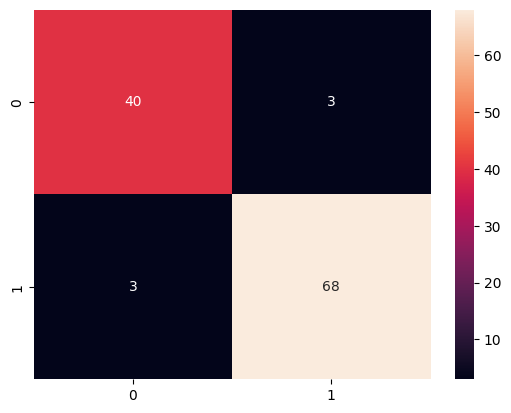

In [329]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,knnc.predict(xtest))
sns.heatmap(cf,annot=True,fmt='d')